In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kervis.utils import Model, Dataset, get_cv_dataframe
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, GraphletSampling, WeisfeilerLehman

In [12]:
VH = VertexHistogram()
EH = EdgeHistogram()
SP = ShortestPath()
GS_3 = GraphletSampling(k=3)
GS_4 = GraphletSampling(k=4)
GS_5 = GraphletSampling(k=5)
WL_3 = WeisfeilerLehman(n_iter=3)
WL_4 = WeisfeilerLehman(n_iter=4)
WL_5 = WeisfeilerLehman(n_iter=5)

# Model selection

In [13]:
methods = ["logistic", "svm", "xgboost"]
kernels = [VH, EH, SP, GS_3, GS_4, GS_5, WL_3, WL_4, WL_5]

In [14]:
MUTAG = Dataset('MUTAG')

In [15]:
MUTAG_cv = get_cv_dataframe(kernels, methods, MUTAG)

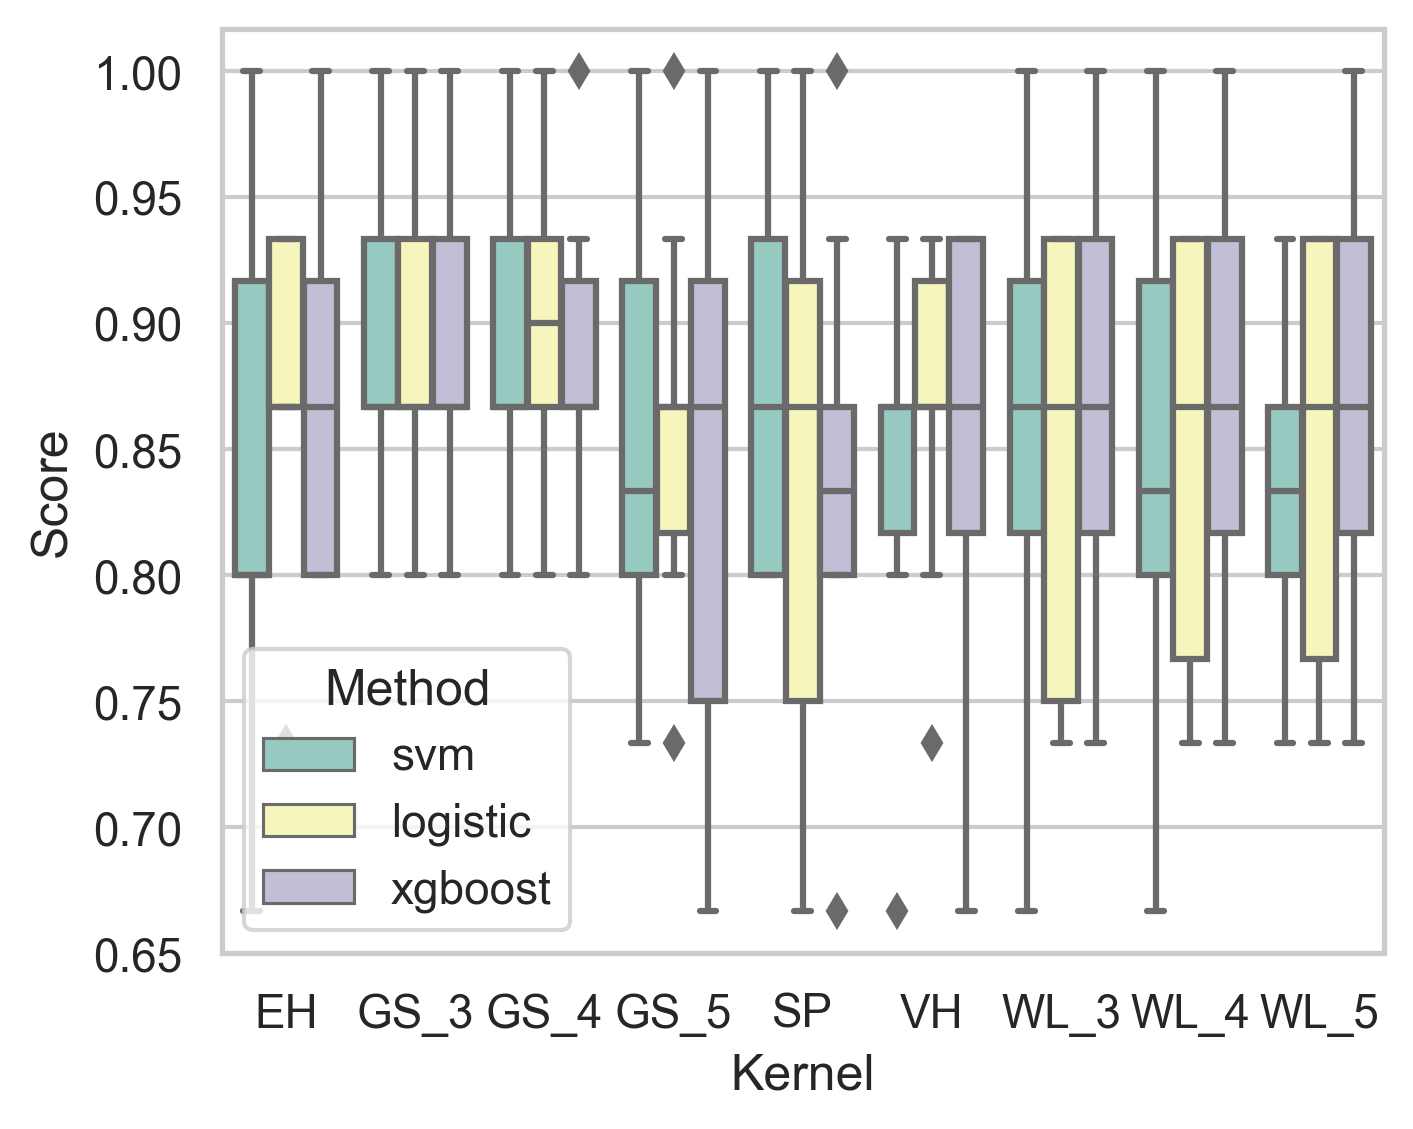

In [24]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5, 4), dpi=300)
ax = sns.boxplot(x="Kernel", y="Score", hue="Method", data=MUTAG_cv, palette="Set3")
plt.savefig('./plots/result/mutag_cv.png', bbox_inches='tight')

In [17]:
MUTAG_cv_median = MUTAG_cv.groupby(['Kernel', 'Method']).median().reset_index().sort_values(by='Kernel')

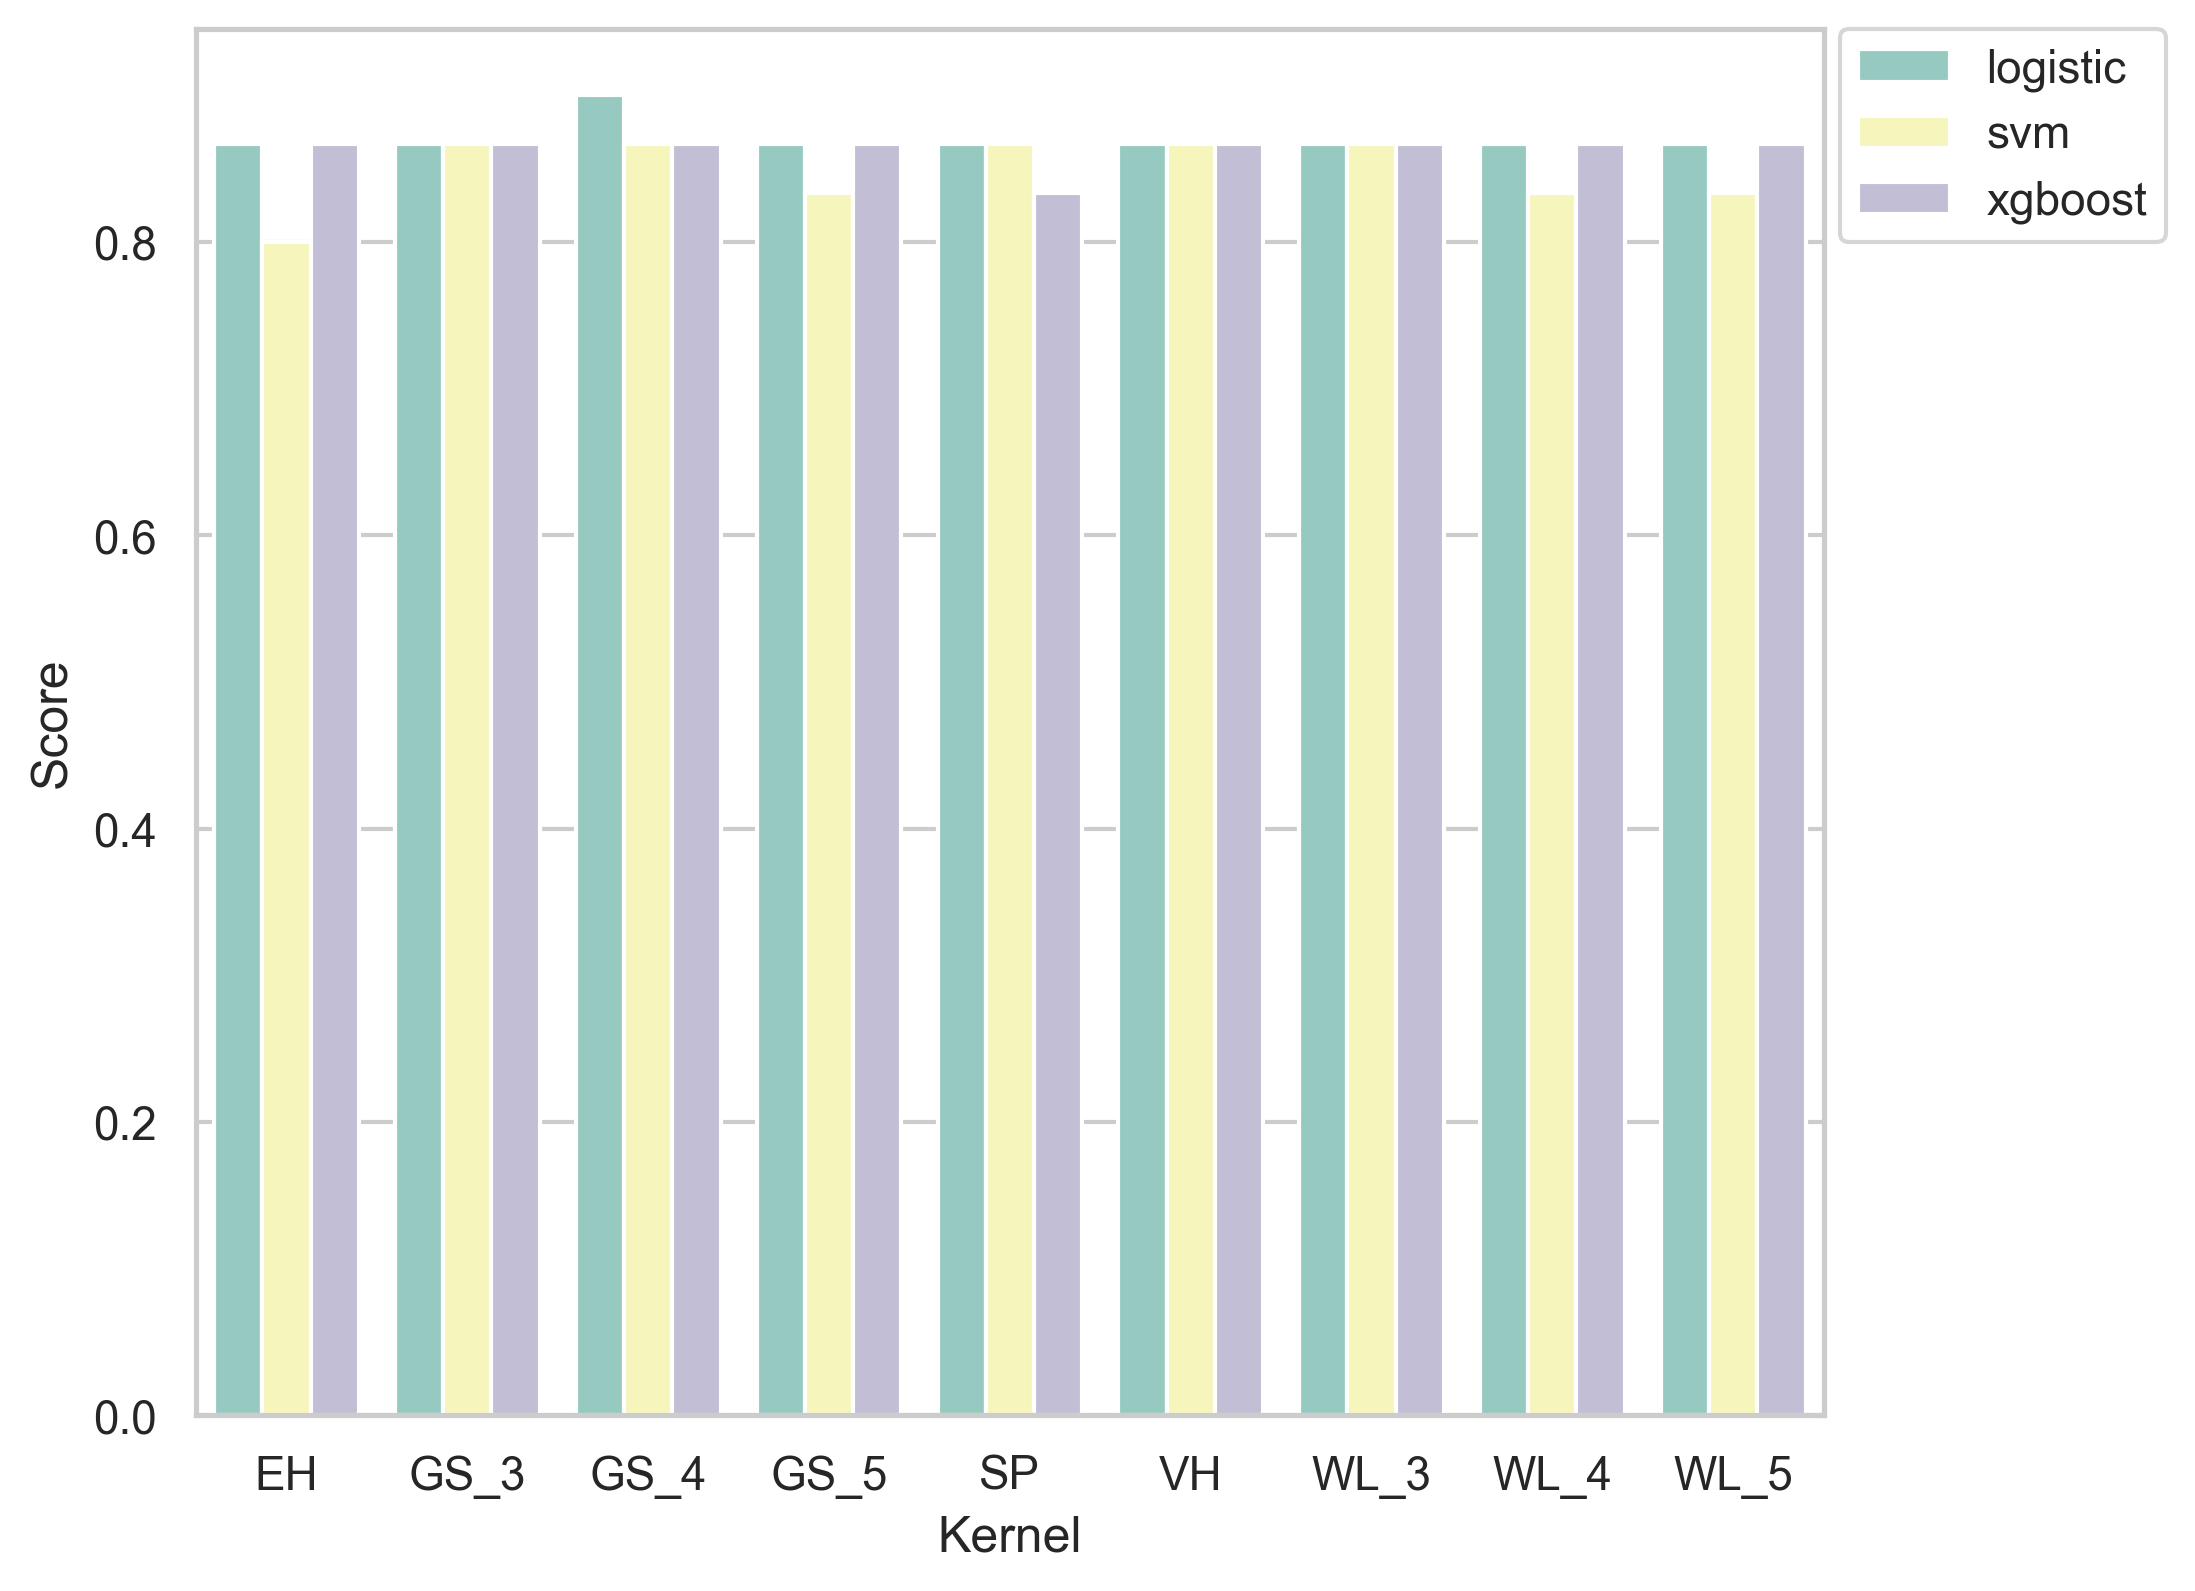

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 6), dpi=300)
ax = sns.barplot(x="Kernel", y="Score", hue="Method", data=MUTAG_cv_median, palette="Set3")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.savefig('./plots/result/mutag_cv_median.png', dpi=300, bbox_inches='tight')

In [19]:
AIDS = Dataset("AIDS")

In [20]:
AIDS_cv = get_cv_dataframe(kernels, methods, AIDS)

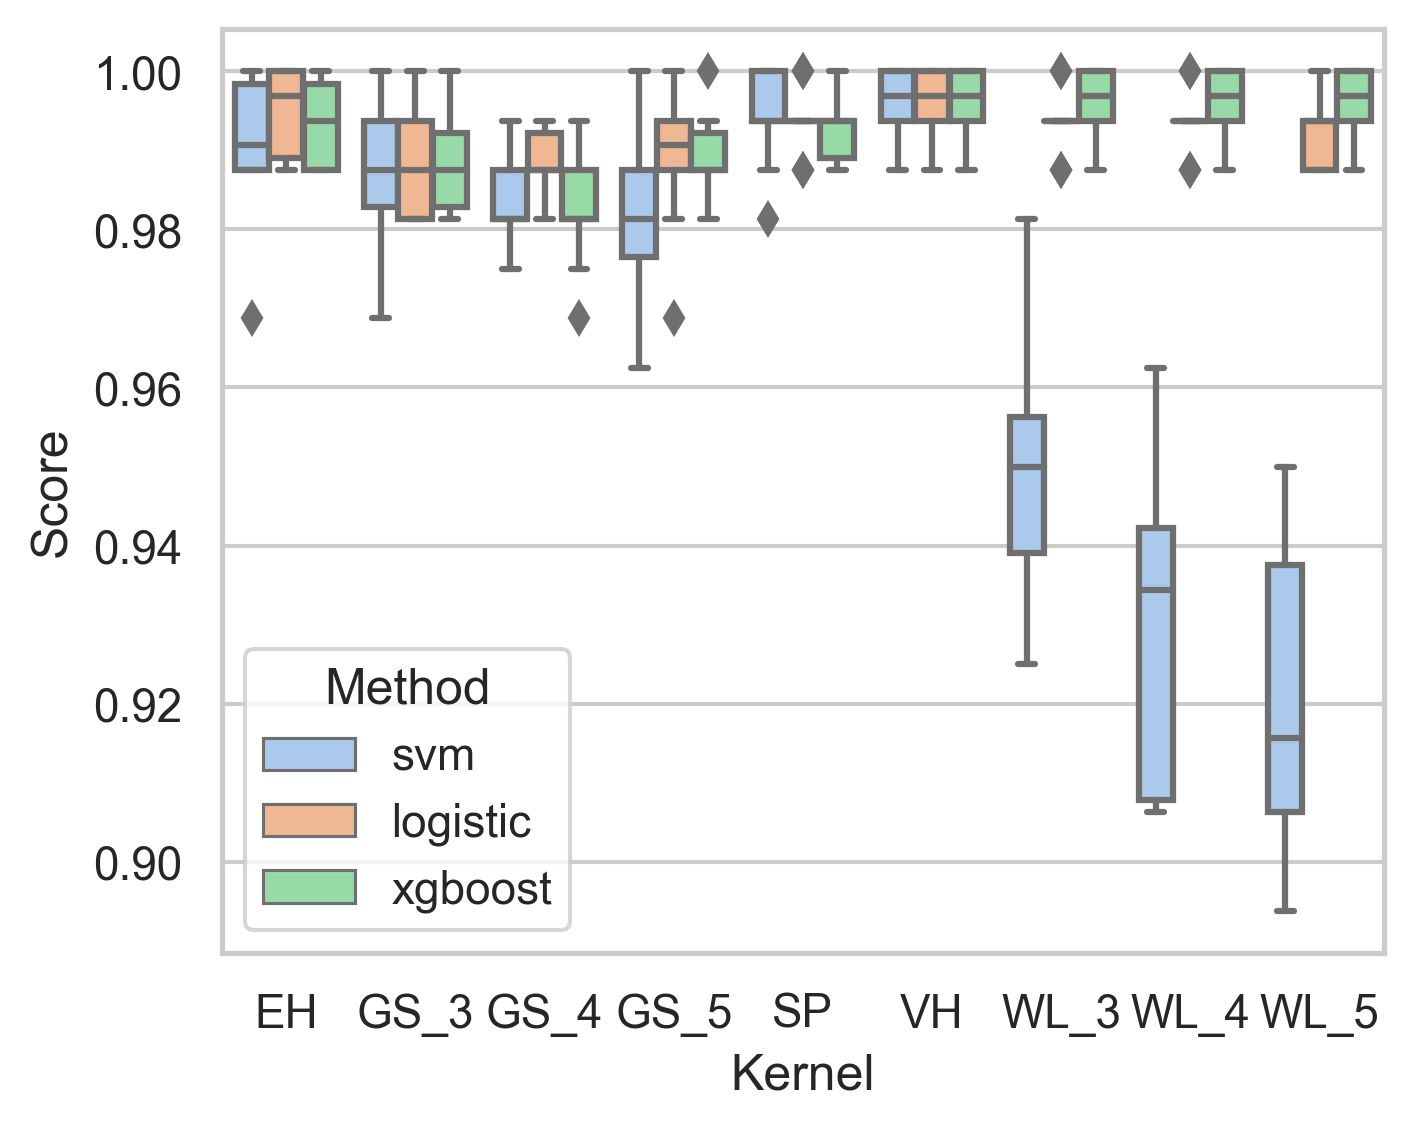

In [21]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5, 4), dpi=300)
ax = sns.boxplot(x="Kernel", y="Score", hue="Method", data=AIDS_cv, palette="pastel")
plt.savefig('./plots/result/AIDS_cv.png', bbox_inches='tight')

In [22]:
AIDS_cv_median = AIDS_cv.groupby(['Kernel', 'Method']).median().reset_index().sort_values(by='Kernel')

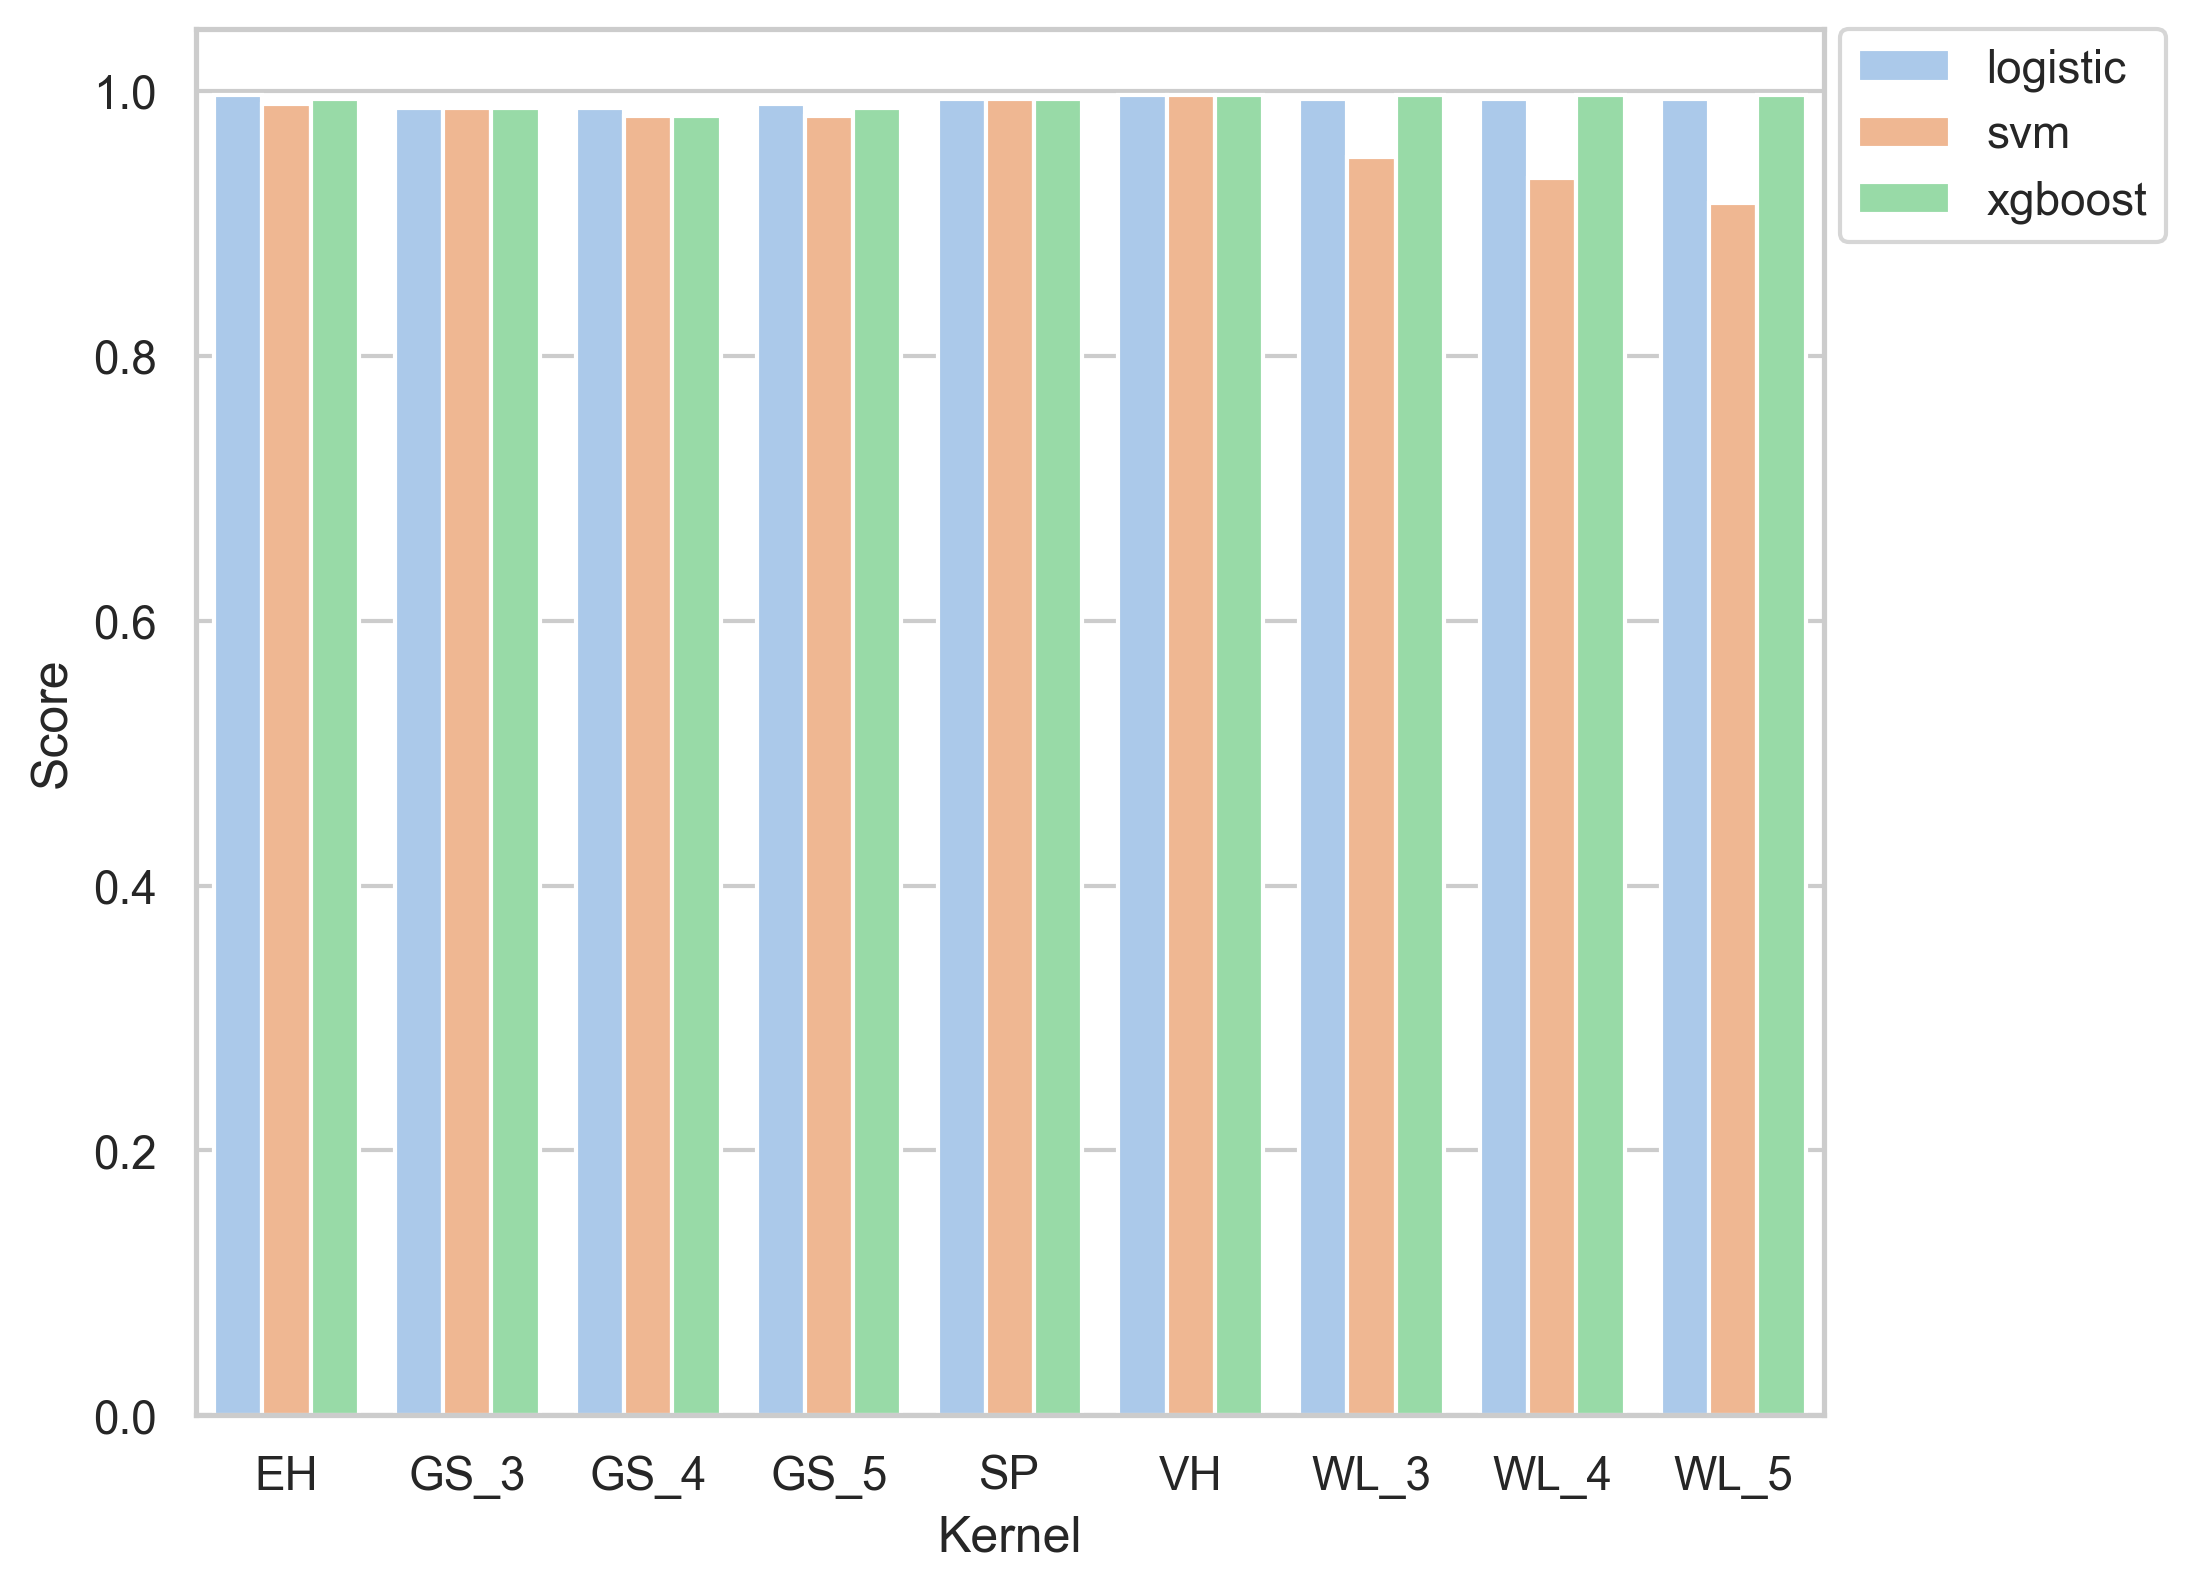

In [23]:
# use seaborn to plot barplot for all kernels and all models for MUTAG dataset
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 6), dpi=300)
ax = sns.barplot(x="Kernel", y="Score", hue="Method", data=AIDS_cv_median, palette="pastel")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.savefig("./plots/result/AIDS_cv_median.png", bbox_inches='tight')